<a href="https://colab.research.google.com/github/CSID-DGU/2021-1-OSSP1-Debugger-4/blob/autoencoder/CNN_AUTOENCODER_ver1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1rsFeNH-ldl3-UCjRoEMUtuxPekRjTEgu?usp=sharing)

ver1.1
model_checkpoint 추가

In [1]:

# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

# 랜덤 시드 고정
SEED=2021
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


(500, 155, 155, 3)
(500, 155, 155, 3)


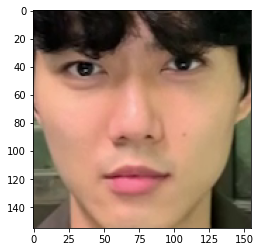

In [4]:
# 케라스에서 불러오기
import glob
paths = glob.glob('./drive/MyDrive/videoimage2/*.png')
#paths = np.random.permutation(paths)

test_data = np.array([plt.imread(paths[i]) for i in range(500)])
#validate_data = np.array([plt.imread(paths[i]) for i in range(801,900)])
plt.imshow(test_data[0].reshape((155,155,3)))


# 피처 스케일링
test_data = test_data/255.
#validate_data = validate_data/255.


#plt.imshow(test_data[0].reshape((222,223,3)))


print(test_data.shape)
print(test_data.shape)

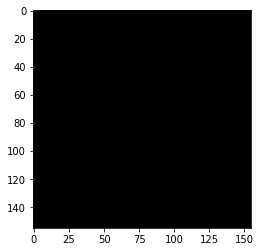

In [5]:
plt.imshow(test_data[0].reshape((155,155,3)))

In [6]:
val_data = test_data[-50:]
test_data = test_data[:-50]

In [14]:
# 오토인코더 모델 정의
def Autoencoder():
  #model = Sequnetial()

  X = tf.keras.layers.Input(shape=[155,155,3])
  input_img_padding = tf.keras.layers.ZeroPadding2D((2,2))(X)
  H = tf.keras.layers.Conv2D(128, kernel_size=3,activation='swish')(input_img_padding)
  H = tf.keras.layers.MaxPool2D()(H)

  H = tf.keras.layers.Conv2D(128, kernel_size=3,activation='swish')(H)
  H = tf.keras.layers.MaxPool2D()(H)

  H = tf.keras.layers.Conv2D(128, kernel_size=3,activation='swish')(H)
  H = tf.keras.layers.MaxPool2D()(H)

  pool_tmp = H.shape.as_list()
  pool_tmp=pool_tmp[1:]
  

  H = tf.keras.layers.Flatten()(H)
  flatten_tmp=H.shape.as_list()
  flatten_tmp=flatten_tmp[1]
  
  
 
  #decode
  H = tf.keras.layers.Dense(10,activation='swish')(H)
  H = tf.keras.layers.Dense(flatten_tmp,activation='swish')(H)
  H = Reshape(pool_tmp)(H)

  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(128,3,activation='swish')(H)
  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(3,3,activation='swish')(H)
  H = tf.keras.layers.UpSampling2D()(H)
  H = tf.keras.layers.Conv2DTranspose(3,3,activation='swish')(H)
  decoded = tf.keras.layers.Cropping2D(cropping=((3, 0), (3, 0)), data_format=None)(H)

  model = tf.keras.models.Model(X,decoded)
  model.compile(optimizer='adam',loss='mean_squared_error', metrics=['acc'])

  return model

ae_model = Autoencoder()
ae_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 155, 155, 3)]     0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 159, 159, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 157, 157, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 78, 78, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 76, 76, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 128)       1475

In [8]:
#모델 체크포인트 설정
checkpoint_path = 'checkpoint.ckpt'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only = True,
                                                save_best_only = True,
                                                moitor='val_loss',
                                                verbose=1)

In [15]:
# 오토인코더 모델 학습
history = ae_model.fit(test_data,
                       test_data,
                       batch_size=3,
                       epochs=10,
                       verbose=1,
                       callbacks=[checkpoint],
                       validation_data=(val_data, val_data))

#ae_images = ae_model.predict(test_data)
#ae_images.shape

Epoch 1/10
150/150 [==============================] - 4s 19ms/step - loss: 9.5116e-07 - acc: 0.8028 - val_loss: 3.4846e-07 - val_acc: 0.8542

Epoch 00001: val_loss did not improve from 0.00000
Epoch 2/10
150/150 [==============================] - 3s 17ms/step - loss: 3.2728e-07 - acc: 0.8467 - val_loss: 3.1278e-07 - val_acc: 0.8760

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/10
150/150 [==============================] - 3s 17ms/step - loss: 3.2501e-07 - acc: 0.8551 - val_loss: 3.1623e-07 - val_acc: 0.8729

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/10
150/150 [==============================] - 3s 17ms/step - loss: 3.2450e-07 - acc: 0.8523 - val_loss: 3.2137e-07 - val_acc: 0.8731

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/10
150/150 [==============================] - 3s 17ms/step - loss: 3.0875e-07 - acc: 0.8610 - val_loss: 3.1457e-07 - val_acc: 0.8710

Epoch 00005: val_loss did not improve from 0.00000
Epoch 6/10
150/150 [===============

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

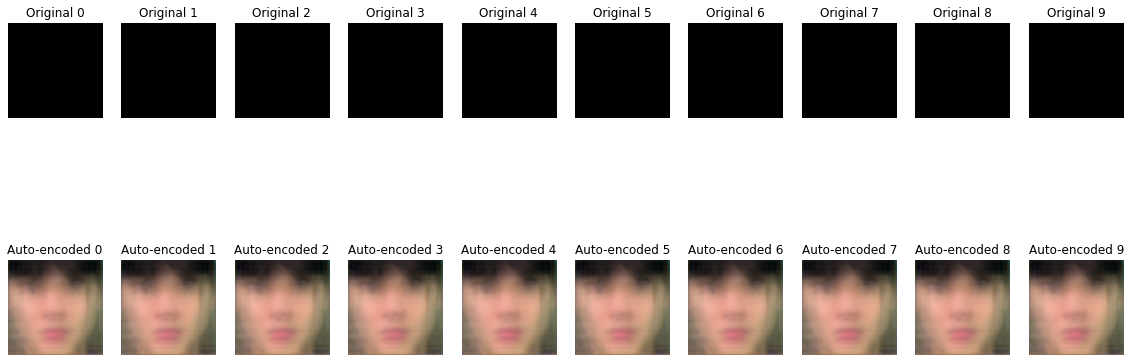

In [19]:
ae_images = ae_model.predict(val_data)
ae_images.shape

num = 10 
plt.figure(figsize=(20,8))
#test_data = test_data*255;
ae_images=ae_images*255
for i in range(10):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(val_data[i].reshape((155,155,3)))
    plt.title("Original %s" % str(i))
    plt.axis('off')
    
    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(ae_images[i].reshape((155,155,3)))
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')
    
plt.show()

In [19]:
ae_model.evaluate(val_data, val_data)

2/2 [==============================] - 0s 84ms/step - loss: 3.3184e-07


3.318405958907533e-07

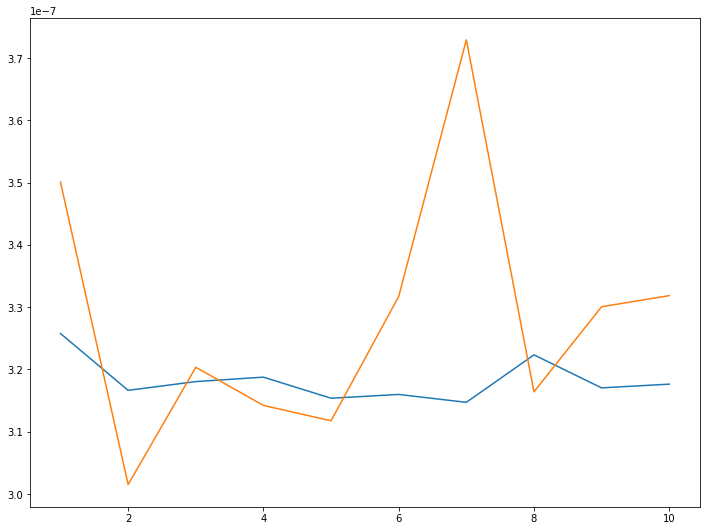

In [26]:
#history.history['loss']

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11), history.history['loss'])
plt.plot(np.arange(1,11), history.history['val_loss'])
plt.show()